In [14]:
%pylab inline
import seaborn as sns
import torch as th
import torch.nn as nn

Populating the interactive namespace from numpy and matplotlib


In [15]:
from scipy.stats import lognorm

x = linspace(0.1,1.5)
def model(x):
  return lognorm.rvs(s=x, loc=2*x)

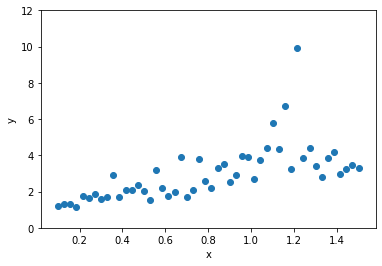

In [16]:
scatter(x, model(x))
xlabel('x')
ylabel('y')
ylim(0,12);

Text(0, 0.5, 'y')

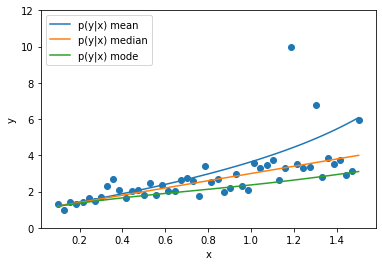

In [17]:
scatter(x, model(x))
plot(x, lognorm.mean(x, loc=2*x), label='p(y|x) mean')
plot(x, lognorm.median(x, loc=2*x), label='p(y|x) median')
plot(x, exp(- x**2) + 2*x, label='p(y|x) mode')
ylim(0,12)
legend()
xlabel('x')
ylabel('y')

In [58]:
# Building training and testing sets 
x_train = np.random.uniform(0.1,1.5,100*1000).reshape(1000,100)
y_train = model(x_train)

train_dataset = th.utils.data.TensorDataset(th.tensor(x_train.reshape(-1,1)), th.tensor(y_train.reshape(-1, 1)))
train_datalaoder = th.utils.data.DataLoader(train_dataset, batch_size=256)

x_test = np.random.uniform(0.1,1.5,100*1000).reshape(1000,100)
y_test = model(x_test)

test_dataset = th.utils.data.TensorDataset(th.tensor(x_test.reshape(-1, 1)), th.tensor(y_test.reshape(-1,1)))
test_datalaoder = th.utils.data.DataLoader(test_dataset)

In [87]:
learning_rate=1e-3
decay=1e-6

l2_model = nn.Sequential(
    nn.Linear(1, 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.Tanh(),
    nn.Linear(128, 1)
)

optimizer = th.optim.Adam(l2_model.parameters(), lr=learning_rate, weight_decay=decay)
criterion =  th.nn.MSELoss()

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform(m.weight)
        
l2_model.apply(init_weights)

/Users/shane/.virtualenvs/ahw/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=1, bias=True)
)

In [95]:
l2_model.

<bound method Module.modules of Sequential(
  (0): Linear(in_features=1, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): Tanh()
  (4): Linear(in_features=128, out_features=1, bias=True)
)>

In [88]:
for epoch in range(20):
    for x, y in train_datalaoder:
        y_pred = l2_model(x.float())

        # Compute and print loss
        loss = criterion(y_pred, y.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print('Epoch {}, loss {}'.format(epoch+1, loss))

Epoch 1, loss 24.676422119140625
Epoch 2, loss 24.581300735473633
Epoch 3, loss 24.528383255004883
Epoch 4, loss 24.501344680786133
Epoch 5, loss 24.484464645385742
Epoch 6, loss 24.47027015686035
Epoch 7, loss 24.459312438964844
Epoch 8, loss 24.45118522644043
Epoch 9, loss 24.44561004638672
Epoch 10, loss 24.441295623779297
Epoch 11, loss 24.436965942382812
Epoch 12, loss 24.434429168701172
Epoch 13, loss 24.43140411376953
Epoch 14, loss 24.430076599121094
Epoch 15, loss 24.42669677734375
Epoch 16, loss 24.422561645507812
Epoch 17, loss 24.41887664794922
Epoch 18, loss 24.41697120666504
Epoch 19, loss 24.414657592773438
Epoch 20, loss 24.412065505981445


In [89]:
l2_model.eval()
preds = l2_model(th.tensor(x_test.reshape(-1, 1)).float())
preds = preds.reshape(y_test.shape).detach().numpy()

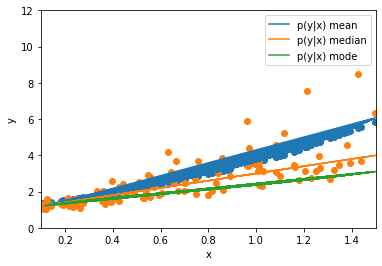

In [90]:
scatter(x_test[0], preds[0])
scatter(x_test[0], y_test[0])
xlabel('x')
ylabel('y')
xlim(0.1,1.5)
ylim(0,12)
plot(x, lognorm.mean(x, loc=2*x), label='p(y|x) mean')
plot(x, lognorm.median(x, loc=2*x), label='p(y|x) median')
plot(x, exp(- x**2) + 2*x, label='p(y|x) mode')
legend()

In [83]:
preds

array([[1.6524858, 3.3002317, 4.465593 , ..., 2.0600147, 1.8436011,
        1.5922856],
       [2.39022  , 5.6570034, 2.5006611, ..., 5.531452 , 5.844982 ,
        4.6158648],
       [5.2893577, 2.7285035, 3.9208   , ..., 2.3092759, 2.1380982,
        2.1190197],
       ...,
       [2.3935025, 2.351248 , 4.0902443, ..., 1.7541642, 5.6905284,
        4.661187 ],
       [4.013382 , 3.1948922, 1.5698551, ..., 3.2423167, 2.3876247,
        4.333    ],
       [3.7097757, 2.6575298, 3.0424266, ..., 2.451561 , 5.7284975,
        2.2210696]], dtype=float32)

In [84]:
nn.Linear?